# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2020-07-01 12:24:14--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2020-07-01 12:24:15--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.cs

In [3]:
df = pd.read_csv('pubchem_fp_acetylcholinesterase_bioactivity_data_3class_pIC50.csv')

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [4]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6364,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6365,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6366,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [5]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
6363    6.795880
6364    5.100000
6365    4.000000
6366    4.200000
6367    5.000000
Name: pIC50, Length: 6368, dtype: float64

### **3.3. Let's examine the data dimension**

In [6]:
X.shape

(6368, 881)

In [7]:
Y.shape

(6368,)

### **3.4. Remove low variance features**

In [50]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [9]:
X.shape

(6368, 145)

## **4. Data split (80/20 ratio)**

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
X_train.shape, Y_train.shape

((5094, 145), (5094,))

In [12]:
X_test.shape, Y_test.shape

((1274, 145), (1274,))

## **5. Building a Regression Model using Random Forest**

In [61]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5642628835930328

In [44]:
Y_pred = model.predict(X_test)
Y_pred1 = pd.DataFrame(Y_pred, columns=['Y_pred'])
Y_pred1

,Y_pred
0,6.338287
1,4.853259
2,5.508804
3,5.855787
4,4.603909
...,...
1269,4.932514
1270,6.694342
1271,5.003534
1272,7.159456


In [45]:
len(Y_pred)

1274

In [46]:
Y_test.to_csv('Y_test.csv', index=False)

In [47]:
Y_test = pd.read_csv('Y_test.csv')
Y_test

,pIC50
0,6.744727
1,4.577903
2,5.000000
3,5.552842
4,4.380594
...,...
1269,4.515700
1270,6.481486
1271,4.898941
1272,5.000000


In [48]:
len(Y_test)

1274

In [49]:
table = pd.concat([Y_test, Y_pred1], axis=1)
table

,pIC50,Y_pred
0,6.744727,6.338287
1,4.577903,4.853259
2,5.000000,5.508804
3,5.552842,5.855787
4,4.380594,4.603909
...,...,...
1269,4.515700,4.932514
1270,6.481486,6.694342
1271,4.898941,5.003534
1272,5.000000,7.159456


## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

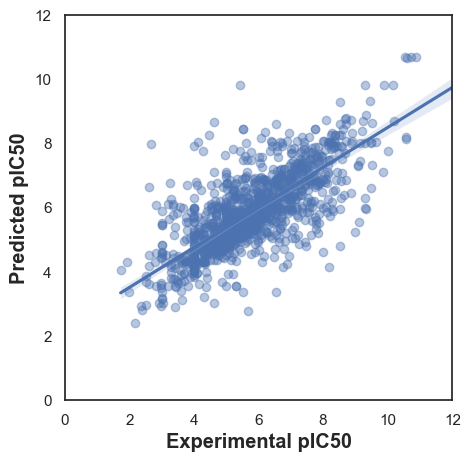

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(data=table, x='pIC50', y='Y_pred', scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

In [62]:
XF = X[2:3]
Y_prediction = model.predict(XF)
Y_prediction

array([4.71297258])